## Lesson 03 - NumPy and pandas

So far we have covered the base Python environment - built in data types and structures, and looked at how we can use Python as a general purpose programming language.

Now we will hone in on our goal of data science - using the data science modules developed by the data science community. Download todays [notebook here](/pythoncourse/assets/r&d/Lesson - 03.ipynb).

This lesson and the next lesson are based on the book [Python for data analysis](http://shop.oreilly.com/product/0636920023784.do), by Wes McKinney, the primary developer of pandas. Feel free to go without the book - we will cover much of its content in the class, and it is a little outdated.

The first module we will examine is NumPy and we will the move onto pandas. NumPy provides arrays, while pandas provides DataFrames. 

### NumPy

NumPy stands for numerical Python. So far the Python data structures have worked, but have not been tailored for large scale data analysis.

Think of how Python works under the hood when multiplying every element of a list by 2:

In [1]:
l = [1,2,3,4,5]
print(l*2)
#probably not what we want as statisticians!
print([i *2 for i in l])
#this works, but what about - 
l = [1,2,3,4,'a']
print([i *2 for i in l])

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[2, 4, 6, 8, 10]
[2, 4, 6, 8, 'aa']


Python needs to check each data type to find the times method associated with it. In small examples like this, the overhead is very low, but when we are dealing with millions of rows, it quickly adds up.

To work better with numeric (or other large scale data), numpy introduces the array, a data structure which may only contain one type of data:

In [9]:
import numpy as np
l = [1,2,3,4,5]
k = np.array(l)
print(k * 2)

[ 2  4  6  8 10]


It is also much faster (by a process called vectorisation):

In [3]:
l = range(10000)
k = np.array(l)
%timeit [i * 2 for i in l]
%timeit k * 2

100 loops, best of 3: 2.1 ms per loop
10000 loops, best of 3: 57.6 µs per loop


As well as the array data type, numpy contains broadcasting methods, built in functions utilising the array structure to work extremely fast (by going through C), linear algebra, random numbers and good integration into C and Fortran code

### NumPy  basics

The array is a new class, with a lot of its own methods. The exact implementation is outside the scope of the class, take a look at the [NumPy website](http://www.numpy.org/) for source code and official documentation.

Technically, we use the np.array to create an instance of class ndarray. I'll refer to them as arrays in this lesson.

We can access the type of data contained in an array:

In [4]:
a = np.array([1,2,3,4,5])
print(a.dtype)
print(np.sctypes)

int64
{'float': [<class 'numpy.float16'>, <class 'numpy.float32'>, <class 'numpy.float64'>, <class 'numpy.float128'>], 'others': [<class 'bool'>, <class 'object'>, <class 'str'>, <class 'str'>, <class 'numpy.void'>], 'complex': [<class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'numpy.complex256'>], 'int': [<class 'numpy.int8'>, <class 'numpy.int16'>, <class 'numpy.int32'>, <class 'numpy.int64'>], 'uint': [<class 'numpy.uint8'>, <class 'numpy.uint16'>, <class 'numpy.uint32'>, <class 'numpy.uint64'>]}


We can initialise arrays in a number of ways

In [8]:
#empty - uninitialised, random numbers!
print(np.empty((2, 3, 2)))
#all zeros
print(np.zeros((3, 6)))
#from a list
print(np.array([1,2,3,5]))
#arange is the numpy version of range - gives an array
print(np.arange(10))

[[[  6.90469329e-310   2.13249800e-316]
  [  0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   8.60952352e-072]]

 [[  4.46535817e-090   1.39938874e-076]
  [  1.55075695e+184   1.43927482e+160]
  [  3.99910963e+252   2.32204073e-056]]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[1 2 3 5]
[0 1 2 3 4 5 6 7 8 9]


In [205]:
#can specify data type
arr1 = np.array([1, 2, 3], dtype=np.float64)
#and cast it:
arr1.astype(np.int32)
#changing type copies, rather than modifies in place

array([1, 2, 3])

In [25]:
#numpy is vectorized!
print([1,2,3,4] *2)
print(np.array([1,2,3,4]) *2)
#we do this by broadcasting....

[1, 2, 3, 4, 1, 2, 3, 4]
[2 4 6 8]


In [10]:
print(np.array([1,2,3,4]) * np.array([1,2,3,4]))
#times, / etc
#this is not matrix multiplication!!
print(np.array([[1,2],[3,5]]) * np.array([[1,2],[3,5]]))

[ 1  4  9 16]
[[ 1  4]
 [ 9 25]]


### Subsetting

We can subset much like lists, with the addition of broadcasting for assignment

In [217]:
l = list(range(10))
l[2:5] = 3
print(l)
#error!
l = np.arange(10)
l[2:5] = 3 #broadcasting
print(l)

TypeError: can only assign an iterable

We need to be careful about assigning slices:

In [218]:
#linked! reference
l = np.arange(10)
l_slice = l[5:8]
l_slice[:] = 4
print(l)
#use .copy()

[0 1 2 3 4 4 4 4 8 9]


We can make 2d and 3,4,5... matrices using nested lists, and subset them appropriately:

In [13]:
#nested lists are made to be 2d
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d.shape)
print(arr2d.ndim)
arr2d[1][1]
arr2d[1,1]

arr2d[1:,2:]
arr2d[1,2:]
#multid
arr = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],[[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
print(arr.shape)
print(arr.ndim)
#broadcasting - must match or be one in each dimension!
arr * np.array([[[1,2,3],[4,5,6],[7,8,9]]])

(3, 3)
2
(2, 3, 3)
3


array([[[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]],

       [[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]]])

In [30]:
#on multi dimensional arrays, we can use axis calls to do things by rows or columns:
arr2d.sum()
arr2d.sum(axis = 0)
arr2d.sum(axis = 1)

array([ 6, 15, 24])

We don't need filter: We can subset with booleans much like R: 

In [17]:
#no filter, just use booleans
l = np.random.randn(10)
#could have done from numpy import random
l[l > 0]
k = np.random.randn(10)
k[l > 0] #arbitrary computation!
#works on 2d
arr2d[arr2d > 3]
#or just get the booleans:
arr2d > 3
#and by assignment
arr2d[arr2d > 3] = 0
arr2d

array([[1, 2, 3],
       [0, 0, 0],
       [0, 0, 0]])

We can subset to rearrange:

In [53]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [244]:
arr[[1,2]]
arr[[7,5]]
#negative to start at end

array([[ 7.,  7.,  7.,  7.],
       [ 5.,  5.,  5.,  5.]])

In [246]:
#np.where
l = np.array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])
k = np.array([[ 50,  90, 100],
       [ 70, 245, 420],
       [110, 490, 0]])
j = l > k
j

array([[False, False,  True],
       [ True,  True,  True],
       [ True, False,  True]], dtype=bool)

In [248]:
np.where(j, l, k)

array([[ 50,  90, 130],
       [ 80, 255, 430],
       [130, 490, 730]])

In [249]:
#or, using broadcasting
l = np.random.randn(20).reshape(4,5)
np.where(l > 0, l, 0)

array([[ 0.43077853,  0.        ,  2.18006544,  0.        ,  0.99805323],
       [ 0.62200891,  0.        ,  1.51734812,  0.        ,  0.4610735 ],
       [ 0.35047453,  0.78169552,  0.        ,  1.40064949,  0.        ],
       [ 0.62944507,  0.        ,  0.        ,  0.        ,  0.        ]])

### Reshape and Matrix methods

Using the built in linear algebra methods, we can carry out matrix operations easily.

We will endeavour to cover more matrix algebra in a lesson including sympy, sciPy and linear optimization.

Reshape allows us to reshape our matrices: 

In [61]:
#reshape
np.arange(15).reshape((3, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [65]:
# .T transposes a matrix
np.arange(15).reshape((3, 5)).T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [70]:
#matrix multiplication
#not
np.arange(15).reshape((3, 5)) * np.arange(15).reshape((3, 5))
#this is elementwise, not useful

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [14]:
#use np.dot for matrix operations
np.dot(np.arange(15).reshape((3, 5)), np.arange(15).reshape((3, 5)).T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [18]:
x = np.arange(1000000).reshape((100, 10000))
np.dot(x, x.T)

array([[-1724114088,     9679576,  1743473240, ..., -1049853224,
          683940440, -1877233192],
       [    9679576,  1016093272,  2022506968, ..., -1152439720,
         -146026024,   860387672],
       [ 1743473240,  2022506968, -1993426600, ..., -1255026216,
         -975992488,  -696958760],
       ..., 
       [-1049853224, -1152439720, -1255026216, ...,  1884158552,
         1781572056,  1678985560],
       [  683940440,  -146026024,  -975992488, ...,  1781572056,
          951605592,   121639128],
       [-1877233192,   860387672,  -696958760, ...,  1678985560,
          121639128, -1435707304]])

NumPy has the expected array of matrix functions, implemented in standard C or fortran code. See the [website documentation](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) for examples. Some of the functions are in the linalg submodule:

In [18]:
from numpy import linalg as LA
w, v = LA.eig(np.diag((1, 2, 3)))
print(np.diag((1,2,3)))
print(w)
print(v)

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[ 1.  2.  3.]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [20]:
#solving:
#5 * x + y = 91 and x + 20 * y = 80
a = np.array([[5,1], [1,20]])
b = np.array([91,80])
LA.solve(a, b)

array([ 17.57575758,   3.12121212])

More on linear algebra later in the course

### NumPy universal functions

NumPy has a number of 'ufuncs' built in. These are fast, as they are (mostly) implemented in C, and are a great choice for carrying out element wise operations. For the full list, see the [official docs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

In [253]:
l = np.array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])
np.sqrt(l)
#exp, abs etc
np.mean(l)
np.mean(l, axis = 0)

array([  80.,  255.,  430.])

We have two main classes of ufuncs, unary, which operate on one array, and binary which operate on two:

In [19]:
#binary ufuncs:
l = np.array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])
k = np.array([[ 50,  90, 100],
       [ 70, 245, 420],
       [110, 490, 0]])
np.maximum(l,k)

array([[ 50,  90, 130],
       [ 80, 255, 430],
       [130, 490, 730]])

We can write our own ufuncs using `frompyfunc`. The main benefit of this is to allow broadcasting instead of having to use a loop:

In [27]:
def myfun(x):
    return(oct(x))

print(myfun(l))

TypeError: only integer arrays with one element can be converted to an index

In [28]:
myfun2 = np.frompyfunc(myfun, 1, 1)
myfun2(l)

array([['0o36', '0o120', '0o202'],
       ['0o120', '0o377', '0o656'],
       ['0o202', '0o656', '0o1332']], dtype=object)

### Reading in data

pandas `read_csv` function is much easier, but as a stop gap, and to keep the numbers in NumPy, we can use NumPys built in csv reader. You can see the [offical docs here](https://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html)

In [25]:
np.genfromtxt('http://www.jeremy.kiwi.nz/pythoncourse/assets/data/data.txt',
              skip_header=1,
              missing_values=('MISSING','MISSING','MISSING'),
              filling_values=(-999,-999,-999))

array([[  4.83900000e-01,   4.53600000e-01,   3.56100000e-01],
       [  1.29200000e-01,   6.87500000e-01,  -9.99000000e+02],
       [  1.78100000e-01,   3.04900000e-01,   8.92800000e-01],
       [ -9.99000000e+02,   5.80100000e-01,   2.03800000e-01],
       [  5.99300000e-01,   4.35700000e-01,   7.41000000e-01]])

### NumPy Summary

NumPy is a large library - we haven't touched on its sorting, sets, or random number generations capabilities. However, as pandas is based on NumPy arrays, we will continue to cover it's functionality here.

Here is a quick overview of the example given in the install instructions:

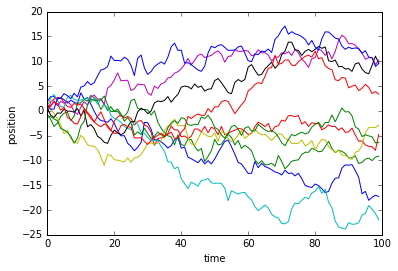

In [104]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

steps, repeats = 100, 10
stepstaken = np.random.randn(steps, repeats)
plt.plot(stepstaken.cumsum(axis = 0));
plt.xlabel('time');
plt.ylabel('position');

## pandas

pandas, short for Python and data analysis (or panel datasets) was created by Wes McKinney, while he was working as a financial analyst (amongst other projects, he is currently working for Apache to get [pandas to work with the Apache Arrow format](http://wesmckinney.com/blog/pandas-and-apache-arrow/)). He initially began it as a port of R into Python for speed, but quickly diverged into a slightly different model.

It is primarily made for time series and tabular data, and its main point of use are the new classes, DataFrame and Series, modelled on Rs dataframe.

In [2]:
from pandas import Series, DataFrame
import pandas as pd

### Series

Series are effectively NumPy arrays, but with an added index, which is retained through operations:

In [107]:
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [256]:
#series are arrays, with an index:
obj.values
obj.index
#indexes are immutable!
obj.index[1] = 5

TypeError: Index does not support mutable operations

You can think of a Series, as a fixed length, ordered dict, and we can easily convert a dict to a Series:

In [111]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
Series(sdata)

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [259]:
#or:
l = Series([35000,71000,16000,5000], index=['Ohio','Texas','Oregon','Utah'])
print(l)
#indices must be unique~!

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [118]:
#subsetting by index
l['Ohio']

35000

In [120]:
#can use all our numpy stuff! And retain our indexes
l[l.values > 30000]

Ohio     35000
Texas    71000
dtype: int64

In [260]:
#reindex with index, fills as NaN
k = Series(l, index=['Ohio','Texas','Oregon','Ontario'])
k

Ohio       35000
Texas      71000
Oregon     16000
Ontario      NaN
dtype: float64

In [132]:
#NaN is the NA/missing for pandas!
k.isnull()
None == None
np.nan == np.nan

False

In [261]:
#add - watch, NaN overwrites!
k + l

Ohio        70000
Ontario       NaN
Oregon      32000
Texas      142000
Utah          NaN
dtype: float64

### DataFrames

DataFrames are similar to a dict of a series - technically they are a 2d series with some linking between levels.

Columns are arrays (must be one data type), and rows are similar to dicts.

However, the row/column mapping is not as strictly enforced as R.

In [3]:
dat = pd.read_csv("http://jeremy.kiwi.nz/pythoncourse/assets/tests/r&d/test1data.csv")[1:20]
dat

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565
10,26,8,Friday,5200010239,1,DSD GROCERY,4606


In [4]:
# get the column names
dat.columns
#get the first five rows
dat.head()
#pick out specific columns
DataFrame(dat,columns=['TripType','VisitNumber'])
#same as
dat[['TripType','VisitNumber']]
#get one specific column
dat.TripType
#get one specific column
dat['TripType']
#use ix (index) to get the 10th row
dat.ix[10]
#add a new column
dat['foo']="spam"
#using other columns:
dat['foo'] = dat['VisitNumber'] + dat['ScanCount']
#add a new column with specific values
dat['foo']=Series(['spam', 'more spam'],index=[4,10])

In [159]:
#delete a column
del dat['foo']
#'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html'

In [43]:
#recall, indexes are immutable?
#how to reindex?
dat = dat.reindex(np.arange(5))
dat

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,foo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,7,Friday,60538815980,1,SHOES,8931,8
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504,8
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565,10
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10


In [41]:
#can add defaults
dat.reindex(np.arange(7),fill_value=0)
dat.reindex(np.arange(10),method='ffill')

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,foo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30,7,Friday,60538815980,1,SHOES,8931,8
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504,8
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565,10
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10
5,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10
6,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10
7,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10
8,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10
9,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,10


In [5]:
dat.drop(1)
dat.drop('foo', axis = 1)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565
10,26,8,Friday,5200010239,1,DSD GROCERY,4606


In [180]:
#getting data
dat[['TripType','Upc']]
dat['ScanCount']>1
dat[dat['ScanCount']>1]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,foo
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565,NaN
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017,spam
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017,NaN
11,26,8,Friday,88679300501,2,PAINT AND ACCESSORIES,3504,NaN
15,26,8,Friday,2238400200,2,PAINT AND ACCESSORIES,3565,NaN
18,26,8,Friday,25541500000,2,DAIRY,1305,NaN


In [3]:
# as promised, .add with fill
l = Series([35000,71000,16000,5000], index=['Ohio','Texas','Oregon','Utah'])
k = Series(l, index=['Ohio','Texas','Oregon','Ontario'])
l = DataFrame(l, columns = ["pop"])
k = DataFrame(k, columns = ["pop"])
print(l+k)
print(l)
print(k)
l.add(k, fill_value=0)

            pop
Ohio      70000
Ontario     NaN
Oregon    32000
Texas    142000
Utah        NaN
          pop
Ohio    35000
Texas   71000
Oregon  16000
Utah     5000
           pop
Ohio     35000
Texas    71000
Oregon   16000
Ontario    NaN


,pop
Ohio,70000
Ontario,NaN
Oregon,32000
Texas,142000
Utah,5000


### Summary

That's it for today. 

Next lesson we will cover in more detail how to read in and clean data, as well as merging, and the split, apply, combine methods on DataFrames.

### Exercises

1\. Create an array of size 10, with all 0s

2\. Reshape the above vector to have dims of (5,2)

3\. Create a 4\*4 identity matrix in NumPy (use google or the docs for a function)

4\. Create a 10 by 10 matrix or random values (randn, mean = 3), and find the minimum and maximum values. Find the index of these values

5\. Normalise the above matrix to have a mean of 0

6\. Create a Series, which has an index of NY, SF, TO, and CH, and the values 0.2, 0.9, 3.5 and 2.4

7\. Reindex this series to include VA with NA

8\. Add the two above Series, correcting for NaN